### Dataset & EDA

In [9]:
import pandas as pd

In [10]:
true = pd.read_csv('True.csv')

In [11]:
true.head(3)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"


In [13]:
fake = pd.read_csv('Fake.csv')

In [14]:
fake.head(3)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"


In [15]:
true.shape

(21417, 4)

In [16]:
fake.shape

(23481, 4)

In [17]:
true['label'] = 1

In [18]:
true.head(3)

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [19]:
fake['label'] = 0

In [20]:
fake.head(3)

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0


In [21]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [22]:
df.shape

(10002, 5)

In [23]:
df = df.sample(frac=1).reset_index(drop=True)

In [24]:
df.head()

,title,text,subject,date,label
0,Illinois fights potential hike in disabled car...,CHICAGO (Reuters) - Illinois fought on Friday ...,politicsNews,"August 4, 2017",1
1,Desperate Trump Considers Dumping Spicer For ...,Desperate to look better in the public eye aft...,News,"May 13, 2017",0
2,Meet The Girl Republicans Are Trying Like Hel...,Republicans are hell bent on repealing Obamaca...,News,"March 23, 2017",0
3,"Factbox: Trump's manufacturing panel CEOs, com...",(Reuters) - Four business leaders have resigne...,politicsNews,"August 14, 2017",1
4,White House intruder was on grounds for 16 min...,WASHINGTON (Reuters) - A man who jumped over t...,politicsNews,"March 17, 2017",1


In [25]:
X = df.drop('label', axis=1)

In [26]:
y = df['label']

In [27]:
df = df.dropna()

In [28]:
messages = df.copy()

In [ ]:
messages.reset_index(inplace=True)

In [31]:
messages.head()

,title,text,subject,date,label
0,Illinois fights potential hike in disabled car...,CHICAGO (Reuters) - Illinois fought on Friday ...,politicsNews,"August 4, 2017",1
1,Desperate Trump Considers Dumping Spicer For ...,Desperate to look better in the public eye aft...,News,"May 13, 2017",0
2,Meet The Girl Republicans Are Trying Like Hel...,Republicans are hell bent on repealing Obamaca...,News,"March 23, 2017",0
3,"Factbox: Trump's manufacturing panel CEOs, com...",(Reuters) - Four business leaders have resigne...,politicsNews,"August 14, 2017",1
4,White House intruder was on grounds for 16 min...,WASHINGTON (Reuters) - A man who jumped over t...,politicsNews,"March 17, 2017",1


In [30]:
messages['title'][2]

' Meet The Girl Republicans Are Trying Like Hell To Kill (VIDEO)'

In [29]:
messages['text'][2]

'Republicans are hell bent on repealing Obamacare. They don t care how many people it kills. After eight years of demanding the Affordable Care Act be repealed and replaced, the best they could come up with when they finally won the majority, was a plan that will kick 24 million people off of their health insurance. The proposed bill was especially cruel to the elderly, the sick, and the disabled. Thankfully, the American Health Care Act didn t make it past Thursday s House vote, but only because a significant number of Republicans didn t think it was cruel enough.This is Ashley, and she is one of the many people the Republicans are trying to put into an early grave.A few years ago, when she was only 22 years old, Ashley was diagnosed with Lupus, an autoimmune disease in which the body s own immune system turns on itself and attacks various organs throughout the body. Ashley s case proved to be severe. Among other things, the Lupus has attacked her brain, which causes seizures.Her enti

### Preprocessing

In [34]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')


corpus = []
ps = PorterStemmer()

for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)


KeyboardInterrupt: 

In [ ]:
len(corpus)

10002

In [ ]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [ ]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [ ]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [ ]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(3)

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,abus,aca,accept,access,accompani,accomplish,accord,accord new,account,account presid,account presid donald,accur,accuraci,accuraci realdonaldtrump,accus,accus presid,accus trump,achiev,acknowledg,aclu,acosta,across,across countri,act,act like,action,action childhood,action childhood arriv,activ,activist,...,writer,written,wrong,wrongdo,wrote,wrote letter,wrote twitter,wyden,xi,xi jinp,yate,ye,yeah,year,year ago,year elect,year end,year old,year presidenti,year republican,year trump,yell,yellen,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.03832,0.0,0.0,0.0,0.0,0.0,0.0,0.043624,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030131,0.0,0.033505,0.0,0.0,0.042655,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041283,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.085349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.08072,0.0,0.0,0.025289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Passive Aggressive Classifier - Baseline

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [ ]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.998


In [ ]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


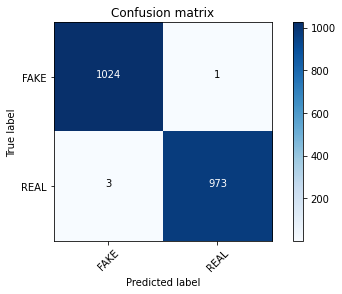

In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
classifier.predict(X_test)

array([0, 0, 0, ..., 0, 1, 1])

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [ ]:
review = re.sub('[^a-zA-Z]', ' ', true['text'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'cairo reuter three polic offic kill eight other injur shoot raid suspect milit hideout giza southwest egyptian capit two secur sourc said friday sourc said author follow lead apart thought hous eight suspect member hasm group claim sever attack around capit target judg policemen sinc last year suspect milit fled exchang fire sourc said egypt accus hasm milit wing muslim brotherhood islamist group outlaw muslim brotherhood deni islamist insurg sinai peninsula grown sinc militari overthrew presid moham mursi muslim brotherhood mid follow mass protest rule milit group stage insurg pledg allegi islam state blame kill hundr soldier policemen start target area includ egypt christian copt'

In [ ]:
val = tfidf_v.transform([review]).toarray()

In [ ]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names())

,abandon,abc,abc news,abe,abil,abl,abort,abroad,absolut,absurd,abus,aca,accept,access,accompani,accomplish,accord,accord new,account,account presid,account presid donald,accur,accuraci,accuraci realdonaldtrump,accus,accus presid,accus trump,achiev,acknowledg,aclu,acosta,across,across countri,act,act like,action,action childhood,action childhood arriv,activ,activist,...,writer,written,wrong,wrongdo,wrote,wrote letter,wrote twitter,wyden,xi,xi jinp,yate,ye,yeah,year,year ago,year elect,year end,year old,year presidenti,year republican,year trump,yell,yellen,yemen,yesterday,yet,yet anoth,yield,york,york citi,york reuter,york time,york time report,young,young peopl,younger,youtub,zero,zink,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.063946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.037189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
classifier.predict(val)

array([1])

### Saving model and TFIDF Vectorizer

In [ ]:
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [ ]:
joblib.dump(tfidf_v, 'tfidfvect.pkl')

['tfidfvect.pkl']

### Load model and vectorizer and predict on previous preprocessed datapoint

In [ ]:
joblib_model = joblib.load('model.pkl')

In [ ]:
joblib_tfidfvect = joblib.load('tfidfvect.pkl')

In [ ]:
val_pkl = joblib_tfidfvect.transform([review]).toarray()

In [ ]:
joblib_model.predict(val_pkl)

array([1])

### Save some datapoints for text random generation

In [8]:
frames_2 = [true.loc[0:10][:], fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

NameError: name 'fake' is not defined

In [ ]:
df_2.to_csv('random_dataset.csv', index=False)